In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Print the total time taken to execute the code
import time
start_time = time.time()

# Load the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/TomasMantero/Predicting-House-Prices-Keras-ANN/master/kc_house_data.csv')



array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

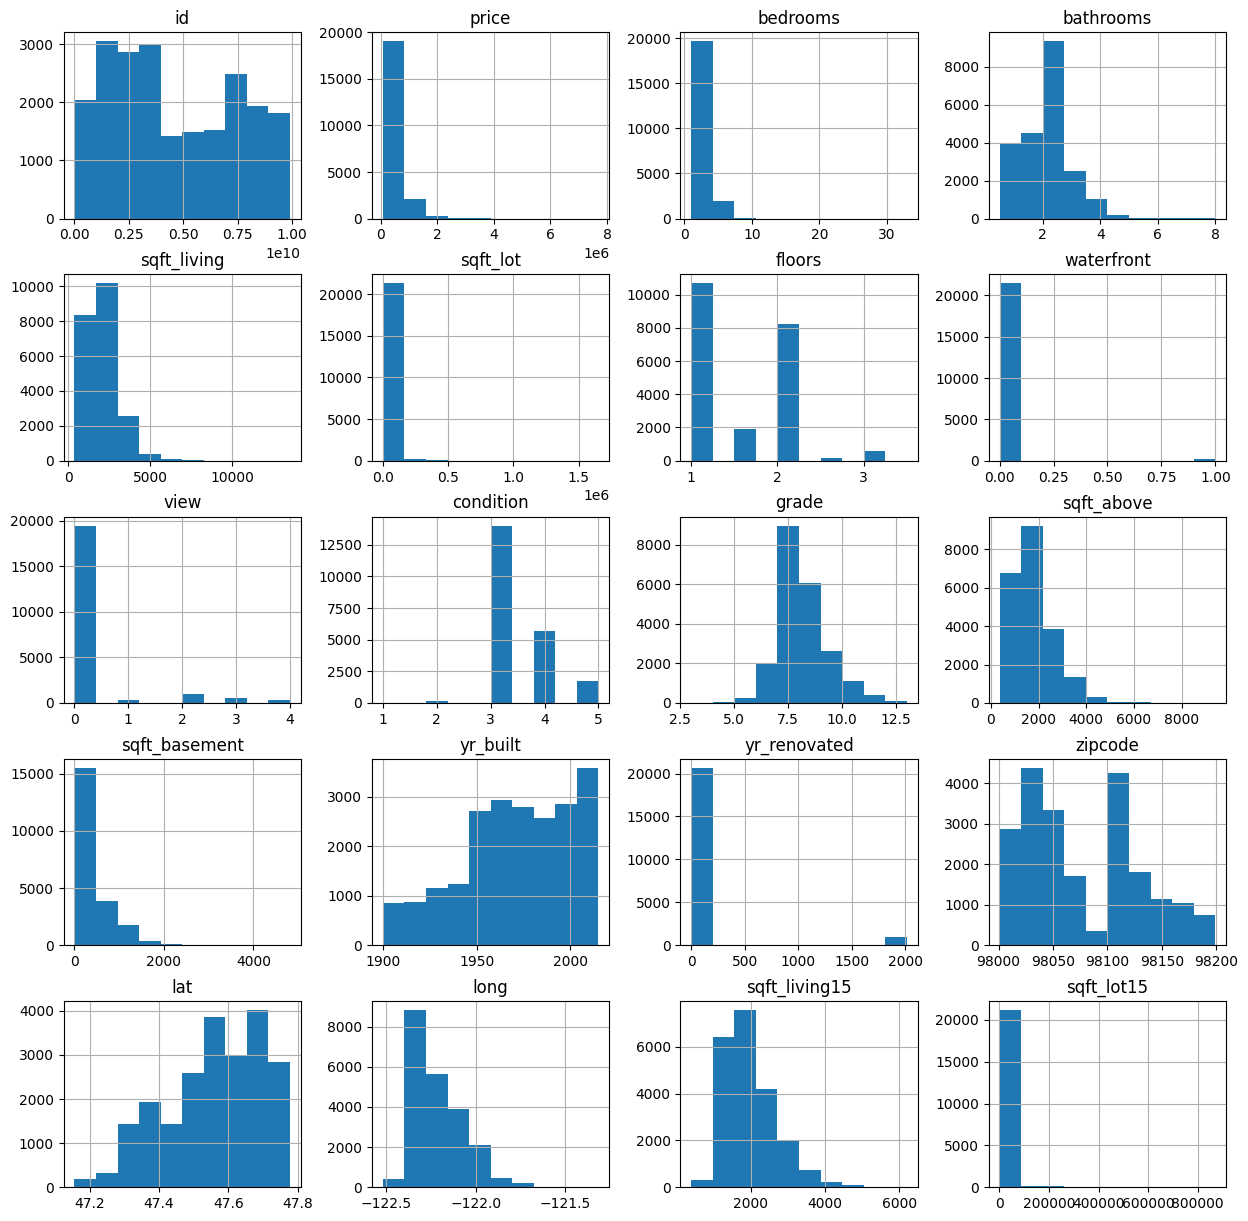

In [2]:
dataset.hist(figsize=(15,15))

elimination of columns with valor is 0 repetitive and string with date 

In [3]:
dataset = dataset.drop(['date', 'sqft_lot', 'waterfront', 'view', 'yr_renovated', 'sqft_lot15'], axis=1)


In [4]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [5]:

max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,id,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
0,0.720103,0.018880,0.06250,0.066667,0.061503,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.893939,0.571498,0.217608,0.161934
1,0.647853,0.060352,0.06250,0.233333,0.167046,0.4,0.5,0.4,0.199115,0.082988,0.443478,0.626263,0.908959,0.166113,0.222165
2,0.568795,0.013382,0.03125,0.066667,0.030372,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.136364,0.936143,0.237542,0.399415
3,0.251157,0.069011,0.09375,0.333333,0.120729,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.681818,0.586939,0.104651,0.165376
4,0.197333,0.056678,0.06250,0.200000,0.099468,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.368687,0.741354,0.393688,0.241094


In [6]:
# Split the data into features and labels
X = data.drop('price', axis=1)
y = data['price']

In [7]:
X.head(4)

,id,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
0,0.720103,0.06250,0.066667,0.061503,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.893939,0.571498,0.217608,0.161934
1,0.647853,0.06250,0.233333,0.167046,0.4,0.5,0.4,0.199115,0.082988,0.443478,0.626263,0.908959,0.166113,0.222165
2,0.568795,0.03125,0.066667,0.030372,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.136364,0.936143,0.237542,0.399415
3,0.251157,0.09375,0.333333,0.120729,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.681818,0.586939,0.104651,0.165376


In [8]:
y.head(4)

0    0.018880
1    0.060352
2    0.013382
3    0.069011
Name: price, dtype: float64

Seed

In [9]:
torch.manual_seed(42)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3)
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)


input_shape=(X_train.shape[1])
print(input_shape)

14


In [11]:
# Definir la arquitectura del modelo
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.layer2 = nn.Linear(16, 1)

    def forward(self, x):
        x = nn.functional.relu(self.layer1(x))
        x = self.layer2(x)
        return x

model = Model(X_train.shape[1])
print(model)

Model(
  (layer1): Linear(in_features=14, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=1, bias=True)
)


In [12]:
# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #The optimizer adam is not avalaible in pytorch in tensorflow yes.


In [13]:
# Entrenar el modelo
num_epochs = 50
batch_size = 100
train_losses = []
test_losses = []


In [23]:
for epoch in range(num_epochs):
    for i in range(0, X_train.shape[0], batch_size):
        # Obtener un batch de datos de entrenamiento y convertirlos a tensores de PyTorch
        inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)

        # Reinicializar los gradientes del optimizador y calcular los logits
        optimizer.zero_grad()
        outputs = model(inputs)

        # Calcular la pérdida y los gradientes
        loss = criterion(outputs, targets)
        loss.backward()

        # Actualizar los parámetros del modelo
        optimizer.step()

    # Calcular las pérdidas de entrenamiento y prueba al final de cada época
    train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.float32))
    train_losses.append(train_loss)

    test_loss = criterion(model(torch.tensor(X_test, dtype=torch.float32)), torch.tensor(y_test, dtype=torch.float32))
    test_losses.append(test_loss)

    # Imprimir las pérdidas de entrenamiento y prueba al final de cada época
    print(f"Epoch {epoch+1}, train loss: {train_loss}, test loss: {test_loss}")


<ipython-input-23-eb2369b91a5c>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-23-eb2369b91a5c>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(y_train[i:i+batch_size], dtype=torch.float32)
<ipython-input-23-eb2369b91a5c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss = criterion(model(torch.tensor(X_train, dtype=torch.float32)), torch.tensor(y_train, dtype=torch.float32))


Epoch 1, train loss: 0.0022583429235965014, test loss: 0.0024983356706798077
Epoch 2, train loss: 0.002258356660604477, test loss: 0.0024983726907521486
Epoch 3, train loss: 0.002258362714201212, test loss: 0.002498389221727848
Epoch 4, train loss: 0.0022583736572414637, test loss: 0.0024984157644212246
Epoch 5, train loss: 0.002258390886709094, test loss: 0.0024984541814774275
Epoch 6, train loss: 0.0022584113758057356, test loss: 0.0024984993506222963
Epoch 7, train loss: 0.002258427906781435, test loss: 0.0024985342752188444
Epoch 8, train loss: 0.002258448163047433, test loss: 0.0024985773488879204
Epoch 9, train loss: 0.002258462365716696, test loss: 0.0024986115749925375
Epoch 10, train loss: 0.0022584921680390835, test loss: 0.0024986709468066692
Epoch 11, train loss: 0.002258499152958393, test loss: 0.002498688641935587
Epoch 12, train loss: 0.0022584989201277494, test loss: 0.002498691203072667
Epoch 13, train loss: 0.0022585196420550346, test loss: 0.0024987298529595137
Epoch

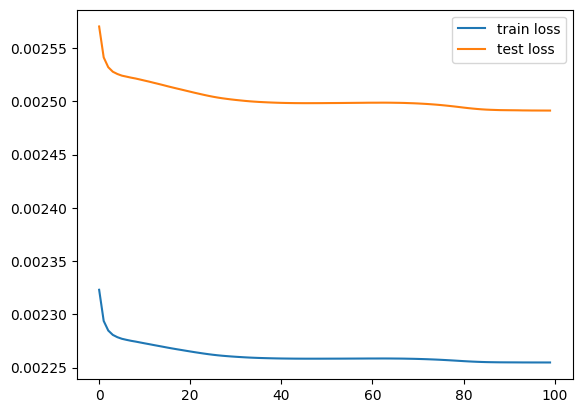

In [24]:
# Convert train_losses and test_losses to PyTorch tensors
train_losses_tensor = torch.tensor(train_losses)
test_losses_tensor = torch.tensor(test_losses)
import matplotlib.pyplot as plt
# Plot the loss curves
plt.plot(train_losses_tensor.detach().numpy(), label='train loss')
plt.plot(test_losses_tensor.detach().numpy(), label='test loss')
plt.legend()
plt.show()


In [16]:
tensor_X_test = torch.tensor(X_test, dtype=torch.float32)
print(tensor_X_test[:4])


tensor([[0.6513, 0.1250, 0.3000, 0.2491, 0.0000, 0.7500, 0.7000, 0.2201, 0.2676,
         0.6522, 0.0152, 0.7489, 0.2450, 0.4855],
        [0.6480, 0.0625, 0.2667, 0.1359, 0.0000, 0.5000, 0.4000, 0.1095, 0.1660,
         0.6783, 0.6667, 0.9226, 0.1561, 0.2772],
        [0.1025, 0.0625, 0.2667, 0.1139, 0.0000, 0.5000, 0.5000, 0.1217, 0.0830,
         0.6957, 0.1667, 0.9178, 0.2600, 0.2635],
        [0.2144, 0.0625, 0.1333, 0.0759, 0.2000, 0.5000, 0.3000, 0.1106, 0.0000,
         0.5043, 0.8434, 0.5102, 0.1836, 0.1671]])


In [17]:
tensor_y_test = torch.tensor(y_test, dtype=torch.float32)
print(tensor_y_test[:4])

tensor([0.1971, 0.0429, 0.0495, 0.0160])


In [18]:
# Evaluar el modelo en el conjunto de prueba
y_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
print(y_pred[:4])


[[0.05874282]
 [0.05828547]
 [0.05787589]
 [0.05839211]]


In [19]:
# Convertir los valores de y_test y y_pred a tensores de PyTorch
y_test_tensor = torch.tensor(y_test)
y_pred_tensor = torch.tensor(y_pred)

# Calcular el MSE
mse = torch.nn.functional.mse_loss(y_pred_tensor, y_test_tensor)
mae = torch.nn.functional.l1_loss(y_pred_tensor, y_test_tensor)

# Calcular el RMSE
rmse = torch.sqrt(mse)

print('RMSE:', rmse)
print('MAE:', mae.item())

<ipython-input-19-e4f6b867f5b6>:6: UserWarning: Using a target size (torch.Size([6480])) that is different to the input size (torch.Size([6480, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = torch.nn.functional.mse_loss(y_pred_tensor, y_test_tensor)
<ipython-input-19-e4f6b867f5b6>:7: UserWarning: Using a target size (torch.Size([6480])) that is different to the input size (torch.Size([6480, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mae = torch.nn.functional.l1_loss(y_pred_tensor, y_test_tensor)


RMSE: tensor(0.0500, dtype=torch.float64)
MAE: 0.031018490669323613


In [20]:

# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 61.01164770126343 seconds.


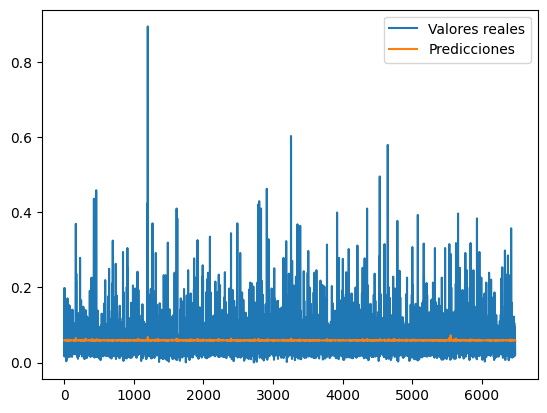

In [25]:


# Obtener las predicciones
y_pred = model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()

# Graficar las predicciones en comparación con los valores reales
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()


In [22]:

# do all the code here

print("Total time taken:", time.time() - start_time, "seconds.")

Total time taken: 61.35069823265076 seconds.
